<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/310lamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [10]:
#Ben's code
#Only use code in this cell if given the power density at a given height and need to find the initial intensity I [cd]

I_zero = 1.54e-05 #Power Density in w/m^2 at a given height h from the LED
h = 0.15 #height from the LED to the plane given for Power density
I = I_zero*(h**2) #Intensity value in cd



In [11]:
#Ben's code
z = 0.10 #Distance from LED plane to target plane in metres


#Comment out the next 3 lines and uncomment the line after that in order to use a given I value in cd
#omega = 2*np.pi #solid Angle
#fi = 1 #Flux in watts
#I = fi/omega
#I = 0.0000154 #Initial intensity in cd

hA = 60 #LED half angle in degrees,,,,,,,,,,,, 63deg half angle is written in LED's datasheet 

#uniformity over 30cm*30cm plane
px = 0.30 #size of plane in x direction (m)
py = 0.30 #size of plane in y direction (m)
num = 300 #Number of points desired in each direction on the plane

In [12]:
f = 60/hA #Variable to adjust theta for different half angles

X = np.outer(1,np.linspace(-px/2,px/2,num)) #Position on plane in x direction
np.round(X,4)                         
Y = np.outer(np.linspace(-py/2,py/2,num),1) #Position on plane in y direction
np.round(Y,4)

x, y = np.meshgrid(X,Y) #This is required to enable the contour plot

E = 0 #Set total illuminance to 0 initially
Enew = 0 #Set storage variable to zero initially to 0 initially

In [13]:

############################## my part,  LEDs positions calculatations #####################
#LEDs array coordinates
"""
LEDs Coordinates of one 325 tile: (0,0), (-8.5mm, 6mm), (8.5mm, 6mm), (8.5mm,- 6mm),(-8.5mm, -6mm) 
"""

#saving LEDs positions to xlist and ylist for calculation
# 
xlist = [0, 0.0085, 0.0085, -0.0085, -0.0085 ]
ylist = [0, 0.006, -0.006, 0.006, -0.006]

#xlist = [0]
#ylist = [0]



# LEDs coordinates centered at (0,0)
#empty lists for saving LEDs coordinates
xlist_11 = [] # x coordinates for 1 unit
xlist_22 = [] # x coordinates for 2 unit
xlist_33 = [] # x coordinates for 3 unit
xlist_44 = [] # x coordinates for 4 unit
xlist_55 = [] # x coordinates for 5 unit
xlist_66 = [] # x coordinates for 6 unit
xlist_77 = [] # x coordinates for 7 unit
xlist_88 = [] # x coordinates for 8 unit
xlist_89 = []
ylist_11 = [] # y coordinates for 1 unit
ylist_22 = [] # y coordinates for 2 unit
ylist_33 = [] # y coordinates for 3 unit
ylist_44 = [] # y coordinates for 4 unit
ylist_55 = [] # y coordinates for 5 unit
ylist_66 = [] # y coordinates for 6 unit
ylist_77 = [] # y coordinates for 7 unit
ylist_88 = [] # y coordinates for 8 unit
ylist_89 = []

"""
# for circle radius 10cm
#getting LEds positions for 9clusters of 5LEDs
a = 0.0766
b = 0.0642
c = 0.05
d = 0.0173
e = 0.0939
f = 0.0342
g = 0.0984
h = 0.0866



for i in range(len(xlist)):
  xlist_11.append(xlist[i]+a)
  ylist_11.append(ylist[i]+b)

  xlist_22.append(xlist[i]+0.10)
  ylist_22.append(ylist[i])

  xlist_33.append(xlist[i]+d)
  ylist_33.append(ylist[i]+g)

  xlist_44.append(xlist[i]-c)
  ylist_44.append(ylist[i]+h)

  xlist_55.append(xlist[i]-e)
  ylist_55.append(ylist[i]+f)

  xlist_66.append(xlist[i]-e)
  ylist_66.append(ylist[i]-f)

  xlist_77.append(xlist[i]-c)
  ylist_77.append(ylist[i]-h)

  xlist_88.append(xlist[i]+d)
  ylist_88.append(ylist[i]-g)

  xlist_89.append(xlist[i]+a)
  ylist_89.append(ylist[i]-b)

xlist.extend(xlist_11)
ylist.extend(ylist_11)

xlist.extend(xlist_22)
ylist.extend(ylist_22)

xlist.extend(xlist_44)
ylist.extend(ylist_44)

xlist.extend(xlist_33)
ylist.extend(ylist_33)

xlist.extend(xlist_55)
ylist.extend(ylist_55)

xlist.extend(xlist_66)
ylist.extend(ylist_66)

xlist.extend(xlist_77)
ylist.extend(ylist_77)

xlist.extend(xlist_88)
ylist.extend(ylist_88)

xlist.extend(xlist_89)
ylist.extend(ylist_89)
"""
#below 
a= 0.12
b= 0.12
c = 0.10
for i in range(len(xlist)):
  xlist_11.append(xlist[i]+c)
  ylist_11.append(ylist[i]+a)

  xlist_22.append(xlist[i])
  ylist_22.append(ylist[i]+a)

  xlist_33.append(xlist[i]-c)
  ylist_33.append(ylist[i]+a)

  xlist_44.append(xlist[i]+b)
  ylist_44.append(ylist[i])

  xlist_55.append(xlist[i]-b)
  ylist_55.append(ylist[i])

  xlist_66.append(xlist[i]+c)
  ylist_66.append(ylist[i]-a)

  xlist_77.append(xlist[i])
  ylist_77.append(ylist[i]-a)

  xlist_88.append(xlist[i]-c)
  ylist_88.append(ylist[i]-a)

 
# save LEDs list to one list  which would be used for futher calculation
xlist.extend(xlist_11)
ylist.extend(ylist_11)

xlist.extend(xlist_22)
ylist.extend(ylist_22)

xlist.extend(xlist_44)
ylist.extend(ylist_44)

xlist.extend(xlist_33)
ylist.extend(ylist_33)

xlist.extend(xlist_55)
ylist.extend(ylist_55)

xlist.extend(xlist_66)
ylist.extend(ylist_66)

xlist.extend(xlist_77)
ylist.extend(ylist_77)

xlist.extend(xlist_88)
ylist.extend(ylist_88)


# deleting the (0,0) LED from list, commet this two lines if you work with LED positioned at (0, 0)
del xlist[0:5]
del ylist[0:5]

#printing the LEDs positions, just for checking is every positions calulated correctly
print(xlist)
print(ylist)



[0.1, 0.10850000000000001, 0.10850000000000001, 0.0915, 0.0915, 0, 0.0085, 0.0085, -0.0085, -0.0085, 0.12, 0.1285, 0.1285, 0.11149999999999999, 0.11149999999999999, -0.1, -0.0915, -0.0915, -0.10850000000000001, -0.10850000000000001, -0.12, -0.11149999999999999, -0.11149999999999999, -0.1285, -0.1285, 0.1, 0.10850000000000001, 0.10850000000000001, 0.0915, 0.0915, 0, 0.0085, 0.0085, -0.0085, -0.0085, -0.1, -0.0915, -0.0915, -0.10850000000000001, -0.10850000000000001]
[0.12, 0.126, 0.11399999999999999, 0.126, 0.11399999999999999, 0.12, 0.126, 0.11399999999999999, 0.126, 0.11399999999999999, 0, 0.006, -0.006, 0.006, -0.006, 0.12, 0.126, 0.11399999999999999, 0.126, 0.11399999999999999, 0, 0.006, -0.006, 0.006, -0.006, -0.12, -0.11399999999999999, -0.126, -0.11399999999999999, -0.126, -0.12, -0.11399999999999999, -0.126, -0.11399999999999999, -0.126, -0.12, -0.11399999999999999, -0.126, -0.11399999999999999, -0.126]


In [14]:
#########################################
#Ben's code for calculating the E over the plane
#I made a little change,using one for loop  instade of 2 for loops ,but does the same job

for ledx,ledy in zip(xlist,ylist): #Outer loop to change the y position of the leds for each row of x positions
    Enew = E #Store the total illuminance from previous iteration
    opp = np.sqrt((x-ledx)**2+(y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
    hyp = z**2 + opp**2 #Calculating the straight line distance from the LED to the point on the plane
    theta = np.degrees(np.arctan(opp/z)) #Calculating the angle from the LED to each position on the plane
    thetaA = f*theta #Converting theta to relevant value with respect to LED half angle
    thetaA[thetaA > 90] = 90 #Set all values for thetaA > 90 to 90 so there is no negative illuminance values

    En = (np.cos(np.radians(thetaA))*I)/hyp #Calculating illuminance of each LED for each point on the plane in W/m^2
    E = En + Enew #Adding illuminance from current iteration to total


M = np.max(E) #Peak of the matrix E
print(f"max E in the target plane: {M} ")
#E = E/M #Creating relative illuminance with respect to the peak of E

max E in the target plane: 0.00036916018223163554 


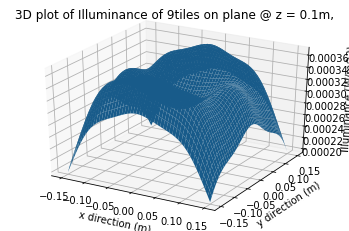

In [15]:
#Ben's code, changed only the set_title
#Code to create a 3D plot of 2D position on the plane and total illuminance
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x,y,E)
ax.set_title(f"3D plot of Illuminance of 9tiles on plane @ z = {z}m,")
ax.set_xlabel("x direction (m)")
ax.set_ylabel("y direction (m)")
ax.set_zlabel("Illuminance (W/m^2)")
#plt.plot(ledx,ledy,'rx')
#plt.contour(x,y,E)
#plt.colorbar(Mappable)
plt.show()

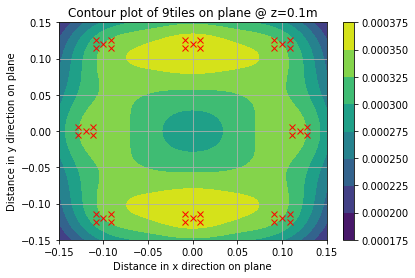

In [16]:
#Ben's code

fig,ax = plt.subplots(1,1)
#V = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1] #Line for putting specific contour lines in the plot
V = [0.9, 0.93, 0.95, 0.98, 1]
#V = [90, 100, M] #Array for making specific contour lines for illuminance in W/m^2
cp = ax.contourf(x,y,E)
#Code below for plotting each LED's position
"""
for j in ylist:
    ledy = -(n-j)*d/2 +py/2 
    for i in xlist:
        ledx = -(n-i)*d/2 +px/2
        plt.plot(ledx,ledy,'rx')
"""
for ledx, ledy in zip(xlist,ylist):
  plt.plot(ledx,ledy,'rx')


fig.colorbar(cp)
plt.title(f"Contour plot of 9tiles on plane @ z={z}m")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()